In [3]:
from jax import grad, jit
from jax.nn import softmax
from jax.nn.initializers import glorot_uniform
import jax.random
import pandas as pd
from skll.metrics import kappa as skll_kappa
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from numpy.testing import assert_almost_equal
import optax
import jax.numpy as jnp
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("./data/preprocessed_data.csv", index_col=0)

TARGET = "NSP"
FEATURES = df.columns.drop(TARGET)

# Reserve a "final final" test set
Xdf = df[FEATURES]
ydf = df[TARGET]
NUM_CLASSES = 3
test_weights = np.array([
# Predicted   N    S    P     # True
            [0.0, 1.0, 1.0],  # N
            [1.0, 0.0, 1.0],  # S
            [1.0, 1.0, 1.0]   # P
])

In [9]:
X_params = Xdf.values
y_params = ydf.values

def sigmoid(v):
    return 1 / jnp.e**-(v)

def logit_layer(X, W):
    v = X @ W
    return sigmoid(v)

def softmax_layer(X, W):
    v = X @ W 
    return softmax(v, axis=1)

def rmse_loss(X, W, y, fn):
    y_hat = fn(X, W)
    return jnp.sqrt(sum((y-y_hat)**2) / len(y))

# Penalties for different types of class confusion
weights = np.array([
# Predicted   N    S    P     # True
            [0.0, 0.5, 0.6],  # N
            [1.0, 0.0, 0.3],  # S
            [2.0, 0.6, 0.0]   # P
])



nr Traced<ShapedArray(float32[])>with<JVPTrace(level=2/1)> with
  primal = Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)>
  tangent = Traced<ShapedArray(float32[])>with<JaxprTrace(level=1/1)> with
    pval = (ShapedArray(float32[]), Traced<AbstractUnit()>with<DynamicJaxprTrace(level=0/1)>)
    recipe = JaxprEqnRecipe(eqn_id=<object object at 0x139416260>, invars=(Traced<ShapedArray(float32[]):JaxprTrace(level=1/1)>,), outvars=[<weakref at 0x139423630; to 'JaxprTracer' at 0x139423270>], primitive=xla_call, params={'device': None, 'backend': None, 'name': 'jvp(fn)', 'donated_invars': (False,), 'inline': True, 'call_jaxpr': { lambda ; a:f32[]. let  in (a,) }}, source_info=<jaxlib.xla_extension.Traceback object at 0x13941eaf0>)


2021-12-07 15:35:40.707629: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:55] 
********************************
Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
Compiling module jit__lambda___5.108820
********************************


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [7]:
jnp.round(jnp.array(
    [
        [0.1, 0.9, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
    ]
))


DeviceArray([[0., 1., 0.],
             [0., 1., 0.],
             [1., 0., 0.],
             [1., 0., 0.],
             [0., 1., 0.],
             [1., 0., 0.]], dtype=float32)

<AxesSubplot:>

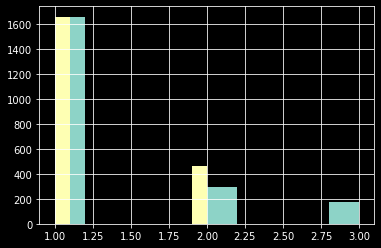

In [10]:
pd.Series(y_params).hist() 
# pd.Series(jnp.argmax(softmax_layer(X_params, params), axis=1)).hist() 

- move to colab for gpu support?